(307, 2)


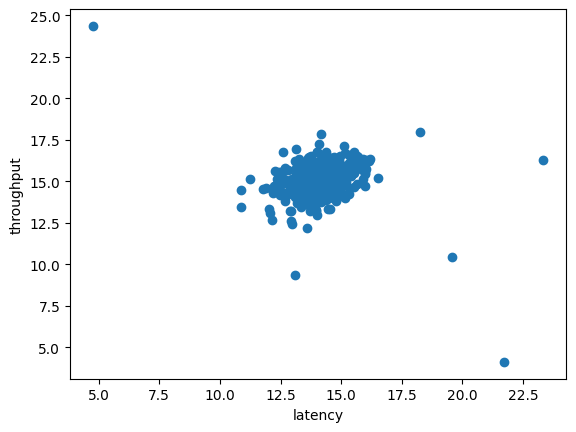

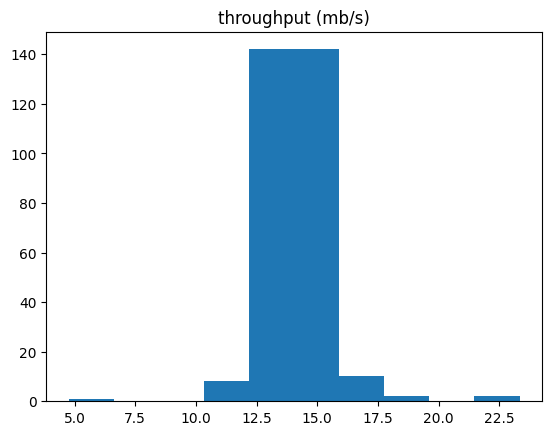

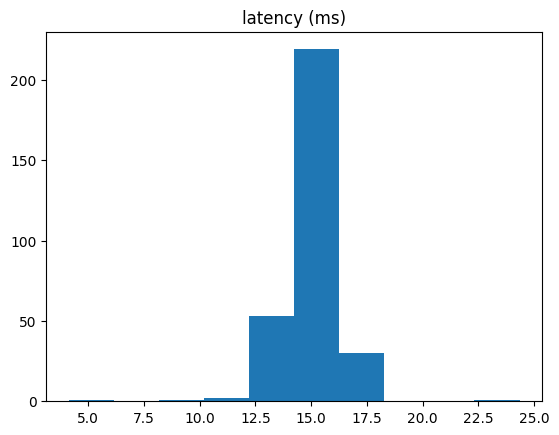

In [83]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.io import loadmat  
 
 
data = loadmat('ex8data1.mat')  
X = data['X']   
# TODO: amount of data
print(X.shape)
#print(X)
# TODO: visualise the dataset and look for anomalies
plt.scatter(X[:,0], X[:,1])
plt.xlabel('latency')
plt.ylabel('throughput')
plt.show()
# TODO: plot the histogram for features: throughput (mb/s) and latency (ms)
plt.hist(X[:, 0])
plt.title("throughput (mb/s)")
plt.show()
plt.hist(X[:, 1])
plt.title("latency (ms)")
plt.show()

In [24]:
def estimate_gaussian(X):  
# TODO: calculate mu and sigma
    mu = sum(X)/len(X)
    sigma = np.sqrt(sum((X - mu)**2)/(len(X)-1))
    return mu, sigma

# TODO: run the function for your dataset
mu, sigma = estimate_gaussian(X)
print(mu, sigma)

[14.11222578 14.99771051] [1.35595738 1.30970712]


In [84]:
Xval = data['Xval']  
yval = data['yval']
 
# TODO: check the number of data
print(Xval.shape)
print(yval.shape)

from scipy import stats
# TODO: calculate the probability for X data
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm.pdf(X[:,0], mu[0], sigma[0])
p[:,1] = stats.norm.pdf(X[:,1], mu[1], sigma[1])

# TODO: calculate the probability for Xval data
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm.pdf(Xval[:,0], mu[0], sigma[0])
pval[:,1] = stats.norm.pdf(Xval[:,1], mu[1], sigma[1])

(307, 2)
(307, 1)


In [82]:
from sklearn.metrics import f1_score

def select_threshold(pval, yval): 
#TODO: select the best epsilon based on the F1 score
    best_f1 = 0
    tresholds = np.linspace(pval.min(), pval.max(), 10000)
    for t in tresholds:
        y = (pval[:, 0]<t) | (pval[:, 1] < t)
        f1 = f1_score(yval, y)
        if best_f1 < f1:
            best_f1 = f1
            best_epsilon = t
    return best_epsilon, best_f1

epsilon, f = select_threshold(pval, yval)
print(epsilon, f)

0.00042648840562710616 0.875


[300 301 301 303 304 306 306]


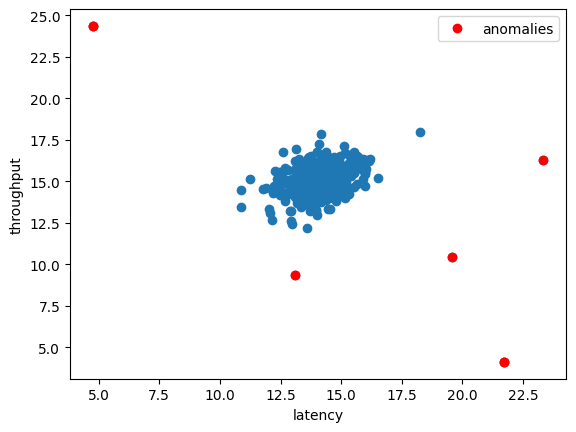

In [106]:
# TODO: find indexes where the p value is lower than epsilon. Use the np.where() function
indexes = np.where(p<epsilon)
print(indexes[0])

a=[]
for i in indexes[0]:
    a.append(X[i])
a = np.array(a)

# TODO: plot the data and analyse the outcome
plt.scatter(X[:,0], X[:,1])
plt.plot(a[:, 0], a[:, 1], 'ro', label='anomalies')
plt.xlabel('latency')
plt.ylabel('throughput')
plt.legend()
plt.show()